This notebook generates a list of labels which can be read directly into the rise tool. It joins labels collected from the labelling tool with images where there is already a label. 

In [32]:
import pandas as pd
import os

In [33]:
annotated_labels = pd.read_csv("annotated_labels_edge_case.csv")["Label Both"]
non_edge_case_labels = pd.read_csv("annotated_labels_non_edge_case.csv")["user_vote_without_prediction"]

In [34]:
import os, glob
all_labels = []

edge_case_counter = 0
edge_case_i = 0
non_edge_case_counter = 0
non_edge_case_i = 0
image_paths = []

for i, file in enumerate(os.listdir("../edge_case_images")):
    image_paths.append(f"../edge_case_images/{file}")
    all_labels.append(annotated_labels[i])

for i, file in enumerate(os.listdir("../non_edge_case_images")):
    image_paths.append(f"../non_edge_case_images/{file}")
    all_labels.append(non_edge_case_labels[i])


In [37]:
pd.DataFrame({"label":all_labels}).to_csv("all_labels")

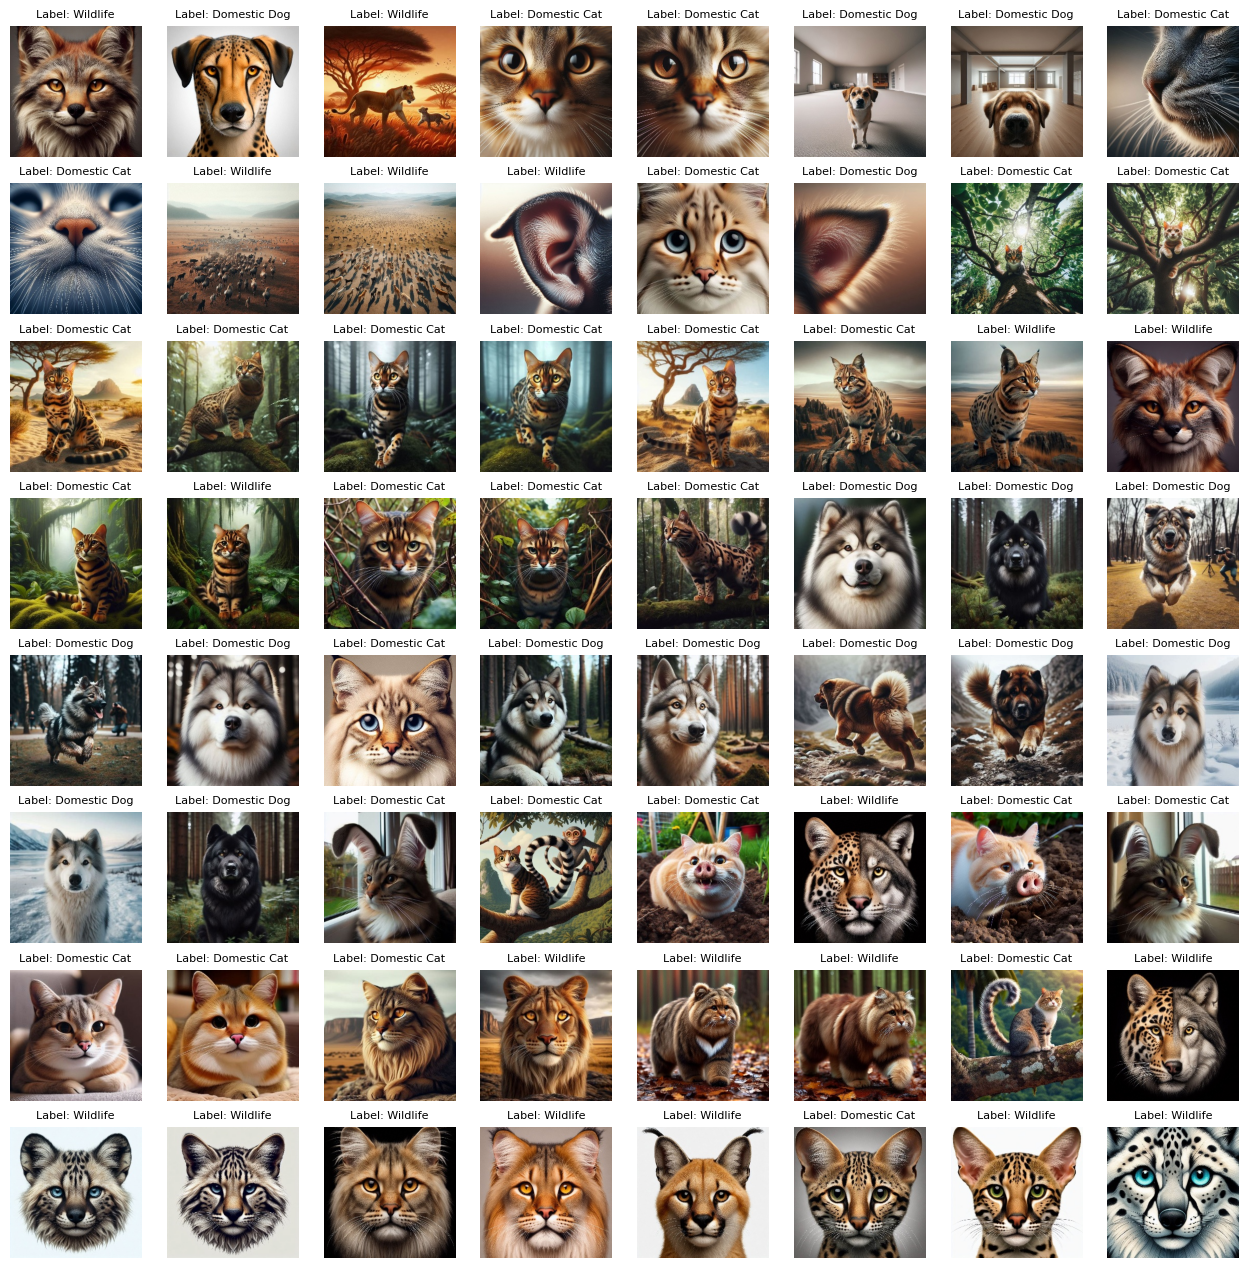

In [36]:
import matplotlib.pyplot as plt
import cv2

images = []

for path in image_paths:
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr, (256,256)) # Reshaping images to preferred size
    images.append(resized_arr)

fig, axs = plt.subplots(8,8, figsize = (16,16))

for i, ax in enumerate(axs.flat):
    try:
        ax.imshow(images[i])
        ax.axis("off")
        ax.set_title(f"Label: {all_labels[i]}",  fontsize=8)
    except:
        ax.axis("off")

fig.subplots_adjust(wspace=0.1, hspace=0.2) 